In [3]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [69]:
der_scores = dict(
    alien=739.9, 
    amidar=188.6,
    assault=431.2,
    asterix=470.8,
    bank_heist=51.0,
    battle_zone=10124.6,
    boxing=0.2,
    breakout=1.9, 
    chopper_command=861.8,
    crazy_climber=16185.3,
    demon_attack=508, 
    freeway=27.9, 
    frostbite=866.8,
    gopher=349.5, 
    hero=6857.0, 
    jamesbond=301.6,
    kangaroo=779.3,
    krull=2851.5,
    kung_fu_master=14346.1,
    ms_pacman=1204.1, 
    pong=-19.3,
    private_eye=97.8,
    qbert=1152.9,
    road_runner=9600.0,
    seaquest=354.1, 
    up_n_down=2877.4,
)

random_scores = dict(
    alien=227.8,
    amidar=5.8,
    assault=222.4,
    asterix=210.0,
    bank_heist=14.2,
    battle_zone=2360,
    boxing=0.1,
    breakout=1.7, 
    chopper_command=811.0,
    crazy_climber=10780.5, 
    demon_attack=152.1,
    freeway=0.0, 
    frostbite=65.2,
    gopher=257.6, 
    hero=1027.0, 
    jamesbond=29.0,
    kangaroo=52.0,
    krull=1598.0,
    kung_fu_master=258.5,
    ms_pacman=307.3, 
    pong=-20.7,
    private_eye=24.9,
    qbert=163.9,
    road_runner=11.5, 
    seaquest=68.4,
    up_n_down=533.4
)

curl_scores = dict(
    alien=1148.2,
    amidar=232.3,
    assault=543.7,
    asterix=524.3,
    bank_heist=193.7,
    battle_zone=11208.0,
    boxing=4.8,
    breakout=18.2, 
    chopper_command=1198.0,
    crazy_climber=27805.6, 
    demon_attack=834.0,
    freeway=27.9, 
    frostbite=924.0,
    gopher=801.4, 
    hero=6235.1, 
    jamesbond=400.1,
    kangaroo=345.3,
    krull=3833.6,
    kung_fu_master=14280.0,
    ms_pacman=1492.8, 
    pong=2.1,
    private_eye=105.2,
    qbert=1225.6,
    road_runner=6786.7, 
    seaquest=408.0,
    up_n_down=2735.2
)


human_scores = dict(
    alien=7127.7,
    amidar=1719.5,
    assault=742,
    asterix=8503.3,
    bank_heist=753.1,
    battle_zone=37187.5,
    boxing=12.1,
    breakout=30.5,
    chopper_command=7387.8,
    crazy_climber=35829.4,
    demon_attack=1971,
    freeway=29.6,
    frostbite=4334.7,
    gopher=2412.5,
    hero=30826.4,
    jamesbond=302.8,
    kangaroo=3035.0, 
    krull=2665.5, 
    kung_fu_master=22736.3,
    ms_pacman=6951.6,
    pong=14.6,
    private_eye=69571.3,
    qbert=13455.0, 
    road_runner=7845.0,
    seaquest=42054.7,
    up_n_down=11693.2
)


nature_scores = dict(
    alien=3069, amidar=739.5, assault=3359,
    asterix=6012, bank_heist=429.7, battle_zone=26300.,
    boxing=71.8, breakout=401.2, chopper_command=6687.,
    crazy_climber=114103, demon_attack=9711., freeway=30.3,
    frostbite=328.3, gopher=8520., hero=19950., jamesbond=576.7,
    kangaroo=6740., krull=3805., kung_fu_master=23270.,
    ms_pacman=2311., pong=18.9, private_eye=1788.,
    qbert=10596., road_runner=18257., seaquest=5286., up_n_down=8456.
)

ilya_scores = dict([
 ['alien', 771.2],
 ['amidar', 102.8],
 ['assault', 452.4],
 ['asterix', 603.5],
 ['bank_heist', 168.9],
 ['battle_zone', 12954.0],
 ['boxing', 6.0],
 ['breakout', 16.1],
 ['chopper_command', 780.3],
 ['crazy_climber', 20516.5],
 ['demon_attack', 1113.4],
 ['freeway', 9.8],
 ['frostbite', 331.1],
 ['gopher', 636.3],
 ['hero', 3736.3],
 ['jamesbond', 236.0],
 ['kangaroo', 940.6],
 ['krull', 4018.1],
 ['kung_fu_master', 9111.0],
 ['ms_pacman', 960.5],
 ['pong', -8.5],
 ['private_eye', -13.6],
 ['qbert', 854.4],
 ['road_runner', 8895.1],
 ['seaquest', 301.2],
 ['up_n_down', 3180.8]])

def to_df(score_dict):
    df = pandas.DataFrame(np.array(list(score_dict.values())).reshape(-1, 1),
                                     index=list(score_dict.keys()),
                                     columns=["GameScoreAverage"])
    return df

atari_der_scores = to_df(der_scores)
atari_human_scores = to_df(human_scores)
atari_random_scores = to_df(random_scores)
atari_nature_scores = to_df(nature_scores)
atari_ilya_scores = to_df(ilya_scores)
atari_curl_scores = to_df(curl_scores)


atari_nature_scores["game"] = list(nature_scores.keys())
atari_der_scores["game"] = list(der_scores.keys())
atari_human_scores["game"] = list(human_scores.keys())
atari_random_scores["game"] = list(random_scores.keys())
atari_ilya_scores["game"] = list(ilya_scores.keys())
atari_curl_scores["game"] = list(curl_scores.keys())

In [70]:
def split_on_fields(df, fields=["n_step", "encoder", "tag",
                                 "batch_size", "replay_ratio",
                                 "batch_t", "jumps", "nce",
                                 "use_all_targets", "time_contrastive",
                                 "model_rl_weight", "detach_model"],
                   min_len=0,
                   min_games=0):
    strings = [""]
    df.tag = [str(t).replace("q_l1", "ql1") for t in df.tag]
    dfs = [df]
    
    for field in fields:
        new_dfs = []
        new_strs = []
        for df, string in zip(dfs, strings):
            if len(set(df[field].astype(str))) == 1:
                new_dfs.append(df)
                new_strs.append(string)
            else:
                for value in set(df[field].astype(str)):
                    new_str = string + "{}: {}  ".format(field[:5], value)
                    new_df = df[np.array([str(x) == str(value) for x in df[field]])]
                    if len(new_df) > min_len and len(set(new_df.game)) >= min_games:
                        new_dfs.append(new_df)
                        new_strs.append(new_str)
    
                    
        dfs = new_dfs
        strings = new_strs
        
    return dfs, [string[:-2] for string in strings]

def find_missing_pairs(dfs, names):
    games = []
    for df in dfs:
        games += list(df.game)
    games = set(games)
    
    for df, name in zip(dfs, names):
        seeds = set(df.seed)
        found_pairs = set([(game, seed) for game, seed in zip(df.game, df.seed)])

        missing_pairs = []
        for seed in seeds:
            for game in games:
                if (game, seed) not in found_pairs:
                    missing_pairs.append("\"--game {} --seed {}\"".format(game, seed))

        missing_pairs = " ".join(missing_pairs)

        print(name)
        print("PAIRS=( {} )".format(missing_pairs))
        print()

In [71]:
def mean_pairwise_score(df1, df2):
    s1 = (df1["GameScoreAverage"] - atari_random_scores["GameScoreAverage"])/\
          (df2["GameScoreAverage"] - atari_random_scores["GameScoreAverage"])
    s2 = (df2["GameScoreAverage"] - atari_random_scores["GameScoreAverage"])/\
          (df1["GameScoreAverage"] - atari_random_scores["GameScoreAverage"])
    score = (s1.mean() - s2.mean())
    return score

def median_pairwise_score(df1, df2):
    s1 = (df1["GameScoreAverage"] - atari_random_scores["GameScoreAverage"])/\
          (df2["GameScoreAverage"] - atari_random_scores["GameScoreAverage"])
    s2 = (df2["GameScoreAverage"] - atari_random_scores["GameScoreAverage"])/\
          (df1["GameScoreAverage"] - atari_random_scores["GameScoreAverage"])
    return (s1.median() - s2.median())

def group_dfs(dfs):
    proc_dfs = []
    for df in dfs:
        if "seed" in df.keys():
            proc_dfs.append(df.groupby(["seed", "game"]).mean().groupby("game").mean())
        else:
            proc_dfs.append(df.groupby("game").mean())
            
    return proc_dfs

def compare_dfs(dfs, names, min_games=0, pairwise_top_n=-1, sort_key=np.median):
    if min_games > 0:
        games = Counter()
        games_count = [Counter(df.game) for df in dfs]
        for count in games_count:
            games = games + count
        mandatory_games = set([g[0] for g in games.most_common()[:min_games]])
        usable_dfs = []
        usable_names = []
        for df, name in zip(dfs, names):
            if set(df.game) >= mandatory_games:
                usable_dfs.append(df)
                usable_names.append(name)
        dfs = usable_dfs
        names = usable_names
    games = set(dfs[0].game)
    for df in dfs[1:]:
        games = games & set(df.game)
    
    games_dfs = group_dfs(dfs)
    
    games_dfs = [df[[g in games for g in df.index]] for df in games_dfs]
    for df in games_dfs:
        gsn = []
        for game, score in zip(df.index, df["GameScoreAverage"]):
            gsn.append((score - random_scores[game])/(human_scores[game] - random_scores[game]))

        df["GameScoreNormalized"] = np.array(gsn)
    
    for df in games_dfs:
        gsn = []
        for game, score in zip(df.index, df["GameScoreAverage"]):
            gsn.append((score - random_scores[game])/(nature_scores[game] - random_scores[game]))

        df["GameScoreNatureNormalized"] = np.array(gsn)
        
    for df in games_dfs:
        gsn = []
        for game, score in zip(df.index, df["GameScoreAverage"]):
            gsn.append((score - random_scores[game])/(der_scores[game] - random_scores[game]))

        df["GameScoreDERNormalized"] = np.array(gsn)
        
    scores = [-sort_key(df["GameScoreNormalized"]) for df in games_dfs]
    indices = np.argsort(scores)
    games_dfs = np.array(games_dfs)[indices]
    names = np.array(names)[indices]
    
    print()    
    print("Human Scores:")
    for df, name in zip(games_dfs, names):
        print("{0}: Median: {1:.3f}, Mean: {2:.3f}".format(name, df["GameScoreNormalized"].median(), df["GameScoreNormalized"].mean()))
    
    print()
    print("Nature Scores:")
    for df, name in zip(games_dfs, names):
        print("{0}: Median: {1:.3f}, Mean: {2:.3f}".format(name, df["GameScoreNatureNormalized"].median(), df["GameScoreNatureNormalized"].mean()))
        
    print()
    print("Comparison over {} games:".format(len(games)))
    if pairwise_top_n < 0:
        pairwise_top_n = len(dfs)
    for i in range(pairwise_top_n):
        print()
        for j in range(pairwise_top_n):
            if i == j:
                continue
            better_games = np.sum(games_dfs[i]["GameScoreAverage"] > games_dfs[j]["GameScoreAverage"])
            mean_comp_score = mean_pairwise_score(games_dfs[i], games_dfs[j])
            median_comp_score = median_pairwise_score(games_dfs[i], games_dfs[j])
            
            print("{} above {}: {}, {:.3f}, {:.3f}".format(names[i], names[j],
                                                           better_games, 
                                                           median_comp_score,
                                                          mean_comp_score))
            
    return games_dfs, names

def sort_games(game_df, key="GameScoreNormalized"):
    indices = np.argsort(game_df[key])
    games_dfs[-1][key][indices]
    for i, game in enumerate(indices):
        i = i+1
        median = (i == len(game_df)//2 or i == len(game_df)//2+1)
        print("{} {} : {:.3f} {:.3f} {}".format(i, 
                                                game_df.index[game],
                                                game_df[key][game],
                                                game_df["GameScoreAverage"][game],
                                                "median" if median else ""))

In [72]:
tui_1_base = pandas.read_csv("wandb_3232_tui_1.csv")
uat_tui1_no_dueling_c51 = pandas.read_csv("uat_tui1_c51_no_aug.csv")
hn_1_base = pandas.read_csv("wandb_hn1_base.csv")
df = pandas.read_csv("wandb_100k_v3.csv")

In [73]:
fixed_jat_gl = pandas.read_csv("uat_fixed.csv")
no_noisy_5k = pandas.read_csv("no_noisy_5k_eps.csv")
new_base = pandas.read_csv("wandb_new_base.csv")
new_base_3232 = pandas.read_csv("new_base_3232.csv")
uat_no_noisy = pandas.read_csv("uat_no_noisy.csv")
base_nt_dueling = pandas.read_csv("base_nt_dueling.csv")

In [74]:
our_drq = pandas.read_csv("drq_initial_results.csv")
our_drq_nd = our_drq[(our_drq["dueling"] == 0) &
                   (our_drq["distributional"] != 0)]
our_drq_d = our_drq[(our_drq["dueling"] == 1) &
                   (our_drq["distributional"] != 0)]
our_drq_dqn = our_drq[(our_drq["dueling"] == 1) &
                   (our_drq["distributional"] == 0)]
our_drq_512_no_pri = pandas.read_csv("drq_512_no_pri.csv")
our_drq_256_nonoops = pandas.read_csv("drq_256_nonoops.csv")

In [75]:
uat_aug = pandas.read_csv("g_uat_aug.csv")
uat_aug_ln = uat_aug[uat_aug["norm_type"] == "ln"]
uat_aug_bn = uat_aug[uat_aug["norm_type"] == "bn"]
nce_aug = pandas.read_csv("wandb_drq_nce.csv")

In [76]:
nce_no_dist = pandas.read_csv("nce1_no_dist.csv")
nce_no_dist_pri = nce_no_dist[nce_no_dist["prioritized_replay"] == 1]
nce_no_dist_no_pri = nce_no_dist[nce_no_dist["prioritized_replay"] == 0]

In [77]:
controls = df[df["n_step"] == 10]
controls = controls[controls["nce"] == 1]
controls = controls[controls["encoder"] == "nature"]
controls = controls[controls["User"] == "ankeshanand"]
controls = controls[controls["batch_size"] == 32]
controls = controls[controls["tag"].astype(str) == "nan"]

our_der = df[df["n_step"] == 10]
our_der = our_der[our_der["nce"] == 0]
our_der = our_der[our_der["encoder"] == "nature"]
our_der = our_der[our_der["User"] == "ankeshanand"]
our_der = our_der[our_der["batch_size"] == 32]
our_der = our_der[our_der["tag"].astype(str) == "nan"]


jat_1_gl = df[(df["n_step"] == 10) & 
         (df["nce"] == 1) & 
         (df["encoder"] == "nature") &
         (df["User"] == "maxa-schwarzer") &
         (df["batch_size"] == 32) &
         (df["time_contrastive"] == 0) &
         (df["global_nce"] == 0) &
         (df["model_rl_weight"] == 0) &
         (df["jumps"] == 5) &
         (df["use_all_targets"] == 1)]

In [97]:
byol_data = pandas.read_csv("byol_replications_v3.csv")

byol_sweeps, byol_names = split_on_fields(byol_data, 
                                          [
                                           "tag",
                                           "noisy_nets", 
                                           "distributional", 
                                           "replay_ratio", 
                                           "jumps",
                                           "classifier",
                                           "augmentation",
                                           "target_update_interval",
                                           "batch_size",
                                           "reward_loss_weight",
                                           "model_rl_weight",
                                           "nce_loss_weight",
                                           "init",
                                           "encoder",
                                          ],
                                          0,
                                         min_games=20)

find_missing_pairs(byol_sweeps, byol_names)


tag: ankesh_config_replication
PAIRS=(  )

tag: ema_target_control
PAIRS=(  )

tag: byol_base_aug_control
PAIRS=( "--game alien --seed 120" "--game pong --seed 88" )

tag: byol_base_control
PAIRS=( "--game pong --seed 88" "--game pong --seed 444" )

tag: byol_ql1_b0
PAIRS=( "--game pong --seed 88" )

tag: byol_base_6432
PAIRS=(  )

tag: nan  targe: 2000
PAIRS=(  )

tag: nan  targe: 1000
PAIRS=(  )

tag: byol_base_shared
PAIRS=( "--game road_runner --seed 101" "--game ms_pacman --seed 88" "--game road_runner --seed 444" )

tag: byol_base_no_ema
PAIRS=( "--game road_runner --seed 444" )

tag: byol_base_aug
PAIRS=(  )

tag: hybrid_aug_control
PAIRS=( "--game crazy_climber --seed 101" )

tag: hybrid_control
PAIRS=( "--game asterix --seed 420" "--game crazy_climber --seed 420" "--game crazy_climber --seed 101" "--game breakout --seed 444" "--game crazy_climber --seed 444" )

tag: byol_ql1_rep_test
PAIRS=( "--game chopper_command --seed 420" "--game boxing --seed 101" "--game chopper_command

In [98]:
names =  ["Base",
          "New Base 32/32",
          "Base w/o target", 
          "Base NT dueling",
          "Base w/ hard negs",
          "Base no-dist Pri 64/32",
          "Base no-dist NoPri 64/32",
          "Base no-dist Pri Aug",
          *byol_names,
          "UAT", 
          "uat_tui1_no_dueling_c51",
          "UAT no-dist pri aug",
#           "UAT aug DQN LN T1",
          "5k-eps-no-target",
          "der", 
#           "nature",
          "our_der",
          "curl",
          "our drq c51 no dueling",
          "our drq c51 dueling",
          "our drq dqn dueling no-dist",
          "our drq 512 no pri",
          "our drq 256 no noops",
          "drq",
             ]
dfs = [new_base,
       new_base_3232,
       tui_1_base,
       base_nt_dueling,
       hn_1_base, 
       nce_no_dist_pri,
       nce_no_dist_no_pri,
       nce_aug,
       *byol_sweeps,
#        jat_1_gl,
       fixed_jat_gl,
       uat_tui1_no_dueling_c51,
       uat_aug_bn,
       no_noisy_5k,
       atari_der_scores, 
#        atari_nature_scores,
       our_der,
       atari_curl_scores,
       our_drq_nd,
       our_drq_d,
       our_drq_dqn,
       our_drq_512_no_pri,
       our_drq_256_nonoops,
       atari_ilya_scores,
                         ]
games_dfs, names = compare_dfs(dfs, names, min_games=0)


Human Scores:
tag: byol_ql1_b0: Median: 0.297, Mean: 0.458
drq: Median: 0.268, Mean: 0.357
tag: byol_ql1_rep_test: Median: 0.258, Mean: 0.444
curl: Median: 0.248, Mean: 0.431
Base: Median: 0.243, Mean: 0.308
UAT: Median: 0.237, Mean: 0.329
tag: nan  targe: 2000: Median: 0.218, Mean: 0.307
tag: nan  targe: 1000: Median: 0.210, Mean: 0.307
tag: byol_base_no_ema: Median: 0.209, Mean: 0.435
UAT no-dist pri aug: Median: 0.205, Mean: 0.467
tag: byol_base_control: Median: 0.200, Mean: 0.338
Base no-dist NoPri 64/32: Median: 0.198, Mean: 0.303
tag: ankesh_config_replication: Median: 0.195, Mean: 0.391
tag: hybrid_aug_control: Median: 0.195, Mean: 0.340
our_der: Median: 0.193, Mean: 0.229
tag: byol_base_6432: Median: 0.191, Mean: 0.339
Base no-dist Pri 64/32: Median: 0.186, Mean: 0.274
Base w/ hard negs: Median: 0.180, Mean: 0.420
5k-eps-no-target: Median: 0.170, Mean: 0.318
uat_tui1_no_dueling_c51: Median: 0.168, Mean: 0.297
tag: hybrid_control: Median: 0.168, Mean: 0.225
Base NT dueling: Med

curl above tag: nan  targe: 2000: 17, 0.709, 1.261
curl above tag: nan  targe: 1000: 18, 0.913, 1.378
curl above tag: byol_base_no_ema: 16, 0.522, 0.163
curl above UAT no-dist pri aug: 18, 0.716, 0.982
curl above tag: byol_base_control: 17, 0.711, 0.676
curl above Base no-dist NoPri 64/32: 20, 1.065, 2.579
curl above tag: ankesh_config_replication: 17, 0.282, 0.167
curl above tag: hybrid_aug_control: 20, 0.681, 0.510
curl above our_der: 20, 1.232, 2.492
curl above tag: byol_base_6432: 18, 1.160, 1.875
curl above Base no-dist Pri 64/32: 23, 1.109, 3.071
curl above Base w/ hard negs: 19, 0.539, 1.584
curl above 5k-eps-no-target: 21, 0.718, 1.876
curl above uat_tui1_no_dueling_c51: 20, 0.884, 2.066
curl above tag: hybrid_control: 23, 1.285, 5.769
curl above Base NT dueling: 21, 0.605, -0.164
curl above der: 20, 0.499, 6.581
curl above our drq dqn dueling no-dist: 18, 0.825, 1.117
curl above Base w/o target: 17, 0.349, 3.730
curl above tag: byol_base_aug: 22, 0.816, 2.487
curl above tag: e

tag: nan  targe: 1000 above Base no-dist Pri Aug: 15, 0.123, 0.626
tag: nan  targe: 1000 above our drq c51 no dueling: 14, 0.094, 0.798
tag: nan  targe: 1000 above tag: byol_base_shared: 25, -0.098, -9.298

tag: byol_base_no_ema above tag: byol_ql1_b0: 7, -0.636, -0.354
tag: byol_base_no_ema above drq: 16, 0.350, -0.168
tag: byol_base_no_ema above tag: byol_ql1_rep_test: 14, -0.049, 0.149
tag: byol_base_no_ema above curl: 10, -0.522, -0.163
tag: byol_base_no_ema above Base: 15, 0.347, 0.407
tag: byol_base_no_ema above UAT: 14, 0.131, 1.061
tag: byol_base_no_ema above tag: nan  targe: 2000: 15, 0.363, 0.619
tag: byol_base_no_ema above tag: nan  targe: 1000: 16, 0.298, 0.615
tag: byol_base_no_ema above UAT no-dist pri aug: 14, 0.119, 0.387
tag: byol_base_no_ema above tag: byol_base_control: 19, 0.332, 0.240
tag: byol_base_no_ema above Base no-dist NoPri 64/32: 16, 0.372, 0.764
tag: byol_base_no_ema above tag: ankesh_config_replication: 15, 0.047, -0.087
tag: byol_base_no_ema above tag: h

Base no-dist NoPri 64/32 above tag: byol_base_aug_control: 10, -0.233, -0.865
Base no-dist NoPri 64/32 above New Base 32/32: 13, 0.005, -0.184
Base no-dist NoPri 64/32 above our drq c51 dueling: 10, -0.209, -1.068
Base no-dist NoPri 64/32 above Base no-dist Pri Aug: 9, -0.178, -0.040
Base no-dist NoPri 64/32 above our drq c51 no dueling: 12, -0.149, -0.233
Base no-dist NoPri 64/32 above tag: byol_base_shared: 22, -0.004, -10.149

tag: ankesh_config_replication above tag: byol_ql1_b0: 10, -0.411, -0.065
tag: ankesh_config_replication above drq: 18, 0.442, 0.173
tag: ankesh_config_replication above tag: byol_ql1_rep_test: 10, -0.216, 0.192
tag: ankesh_config_replication above curl: 9, -0.282, -0.167
tag: ankesh_config_replication above Base: 16, 0.254, 0.385
tag: ankesh_config_replication above UAT: 16, 0.429, 0.024
tag: ankesh_config_replication above tag: nan  targe: 2000: 17, 0.260, 0.443
tag: ankesh_config_replication above tag: nan  targe: 1000: 17, 0.303, 0.626
tag: ankesh_config_r

tag: byol_base_6432 above Base NT dueling: 18, 0.206, -0.869
tag: byol_base_6432 above der: 15, 0.060, 2.241
tag: byol_base_6432 above our drq dqn dueling no-dist: 10, -0.511, -0.243
tag: byol_base_6432 above Base w/o target: 16, 0.189, 0.840
tag: byol_base_6432 above tag: byol_base_aug: 13, 0.053, 0.187
tag: byol_base_6432 above tag: ema_target_control: 15, 0.233, -1.156
tag: byol_base_6432 above our drq 256 no noops: 11, -0.149, 1.638
tag: byol_base_6432 above our drq 512 no pri: 14, 0.017, 1.398
tag: byol_base_6432 above tag: byol_base_aug_control: 13, -0.008, 0.173
tag: byol_base_6432 above New Base 32/32: 16, 0.278, 0.057
tag: byol_base_6432 above our drq c51 dueling: 14, 0.049, -0.094
tag: byol_base_6432 above Base no-dist Pri Aug: 14, 0.169, 0.496
tag: byol_base_6432 above our drq c51 no dueling: 10, -0.167, 0.676
tag: byol_base_6432 above tag: byol_base_shared: 24, -0.084, -19.623

Base no-dist Pri 64/32 above tag: byol_ql1_b0: 7, -0.966, -1.705
Base no-dist Pri 64/32 above drq

uat_tui1_no_dueling_c51 above tag: byol_base_6432: 8, -0.200, -0.744
uat_tui1_no_dueling_c51 above Base no-dist Pri 64/32: 15, 0.299, 0.331
uat_tui1_no_dueling_c51 above Base w/ hard negs: 10, -0.233, -0.377
uat_tui1_no_dueling_c51 above 5k-eps-no-target: 13, 0.029, 0.052
uat_tui1_no_dueling_c51 above tag: hybrid_control: 15, 0.189, 0.158
uat_tui1_no_dueling_c51 above Base NT dueling: 12, -0.111, -1.626
uat_tui1_no_dueling_c51 above der: 9, -0.149, 2.004
uat_tui1_no_dueling_c51 above our drq dqn dueling no-dist: 8, -0.531, -0.656
uat_tui1_no_dueling_c51 above Base w/o target: 11, -0.138, 0.475
uat_tui1_no_dueling_c51 above tag: byol_base_aug: 10, -0.375, -1.158
uat_tui1_no_dueling_c51 above tag: ema_target_control: 12, -0.042, -0.819
uat_tui1_no_dueling_c51 above our drq 256 no noops: 9, -0.670, -9.114
uat_tui1_no_dueling_c51 above our drq 512 no pri: 10, -0.096, 0.795
uat_tui1_no_dueling_c51 above tag: byol_base_aug_control: 7, -0.164, -0.407
uat_tui1_no_dueling_c51 above New Base 32/

our drq dqn dueling no-dist above tag: byol_base_aug: 16, 0.418, 0.384
our drq dqn dueling no-dist above tag: ema_target_control: 16, 0.250, -6.053
our drq dqn dueling no-dist above our drq 256 no noops: 17, 0.174, 3.530
our drq dqn dueling no-dist above our drq 512 no pri: 18, 0.312, 0.698
our drq dqn dueling no-dist above tag: byol_base_aug_control: 18, 0.232, 0.297
our drq dqn dueling no-dist above New Base 32/32: 18, 0.079, 0.510
our drq dqn dueling no-dist above our drq c51 dueling: 14, 0.026, 0.506
our drq dqn dueling no-dist above Base no-dist Pri Aug: 17, 0.338, 0.653
our drq dqn dueling no-dist above our drq c51 no dueling: 16, 0.445, 0.845
our drq dqn dueling no-dist above tag: byol_base_shared: 23, -0.191, -7.981

Base w/o target above tag: byol_ql1_b0: 10, -0.485, -2.448
Base w/o target above drq: 14, -0.002, -2.603
Base w/o target above tag: byol_ql1_rep_test: 12, -0.238, -1.255
Base w/o target above curl: 9, -0.349, -3.730
Base w/o target above Base: 13, -0.044, -1.101
Ba

our drq 512 no pri above curl: 6, -0.809, -2.156
our drq 512 no pri above Base: 15, 0.131, -0.011
our drq 512 no pri above UAT: 10, -0.379, -1.343
our drq 512 no pri above tag: nan  targe: 2000: 13, 0.150, -1.025
our drq 512 no pri above tag: nan  targe: 1000: 13, 0.081, -0.330
our drq 512 no pri above tag: byol_base_no_ema: 10, -0.249, -1.468
our drq 512 no pri above UAT no-dist pri aug: 9, -0.381, -1.133
our drq 512 no pri above tag: byol_base_control: 14, 0.039, -2.721
our drq 512 no pri above Base no-dist NoPri 64/32: 16, 0.099, 0.663
our drq 512 no pri above tag: ankesh_config_replication: 7, -0.333, -1.458
our drq 512 no pri above tag: hybrid_aug_control: 12, -0.106, -0.978
our drq 512 no pri above our_der: 16, 0.615, -0.257
our drq 512 no pri above tag: byol_base_6432: 12, -0.017, -1.398
our drq 512 no pri above Base no-dist Pri 64/32: 16, 0.185, 0.240
our drq 512 no pri above Base w/ hard negs: 11, -0.095, -0.662
our drq 512 no pri above 5k-eps-no-target: 13, 0.285, -0.558
our 

Base no-dist Pri Aug above UAT: 12, -0.105, -0.451
Base no-dist Pri Aug above tag: nan  targe: 2000: 12, -0.210, -0.697
Base no-dist Pri Aug above tag: nan  targe: 1000: 11, -0.123, -0.626
Base no-dist Pri Aug above tag: byol_base_no_ema: 10, -0.271, -1.788
Base no-dist Pri Aug above UAT no-dist pri aug: 9, -0.304, -0.749
Base no-dist Pri Aug above tag: byol_base_control: 12, -0.091, -0.886
Base no-dist Pri Aug above Base no-dist NoPri 64/32: 17, 0.178, 0.040
Base no-dist Pri Aug above tag: ankesh_config_replication: 10, -0.363, -1.248
Base no-dist Pri Aug above tag: hybrid_aug_control: 14, 0.024, -0.623
Base no-dist Pri Aug above our_der: 18, 0.468, 1.524
Base no-dist Pri Aug above tag: byol_base_6432: 12, -0.169, -0.496
Base no-dist Pri Aug above Base no-dist Pri 64/32: 17, 0.366, 0.121
Base no-dist Pri Aug above Base w/ hard negs: 11, -0.076, -0.585
Base no-dist Pri Aug above 5k-eps-no-target: 15, 0.211, -0.033
Base no-dist Pri Aug above uat_tui1_no_dueling_c51: 16, 0.258, 0.060
Bas

In [93]:
for i in range(len(names)):
    print(names[i])
    indices = np.array(list(np.argsort(-games_dfs[i]["GameScoreNormalized"])))
    games_dfs[i]["gshn"] = games_dfs[i].GameScoreNormalized
    games_dfs[i]["gsnn"] = games_dfs[i].GameScoreNatureNormalized
    games_dfs[i]["gsa"] = games_dfs[i].GameScoreAverage
    print(games_dfs[i].iloc[indices][["gsa", "gshn", "gsnn"]])
    print()

tag: byol_ql1_b0
                          gsa      gshn      gsnn
game                                             
krull             3544.420000  1.823344  0.881930
road_runner      13395.200000  1.708521  0.733534
boxing              14.388000  1.190667  0.199275
jamesbond          339.500000  1.134039  0.566916
breakout            25.058000  0.811042  0.058468
freeway             21.428000  0.723919  0.707195
kung_fu_master   14573.800000  0.636864  0.622093
assault            476.286000  0.488618  0.080943
bank_heist         368.680000  0.479740  0.853141
crazy_climber    21684.200000  0.435297  0.105531
frostbite         1436.340000  0.321148  5.211479
pong                -9.585000  0.314873  0.280682
kangaroo           965.600000  0.306269  0.136603
battle_zone      12368.000000  0.287359  0.418045
up_n_down         3540.600000  0.269467  0.379572
hero              6135.688333  0.171436  0.269972
ms_pacman         1380.380000  0.161504  0.535549
demon_attack       444.740000  0.

In [58]:
table_names = ["Random", "Human", "DER", "CuRL", "DrQ", "TeST", "TeST+Aug"]
table_dfs = [atari_random_scores, 
             atari_human_scores, 
             atari_der_scores, 
             atari_curl_scores,
             atari_ilya_scores,
             games_dfs[1],
             games_dfs[0]]
results_df = pandas.DataFrame({name:df.GameScoreAverage for df, name in zip(table_dfs, table_names)},
                              index=games_dfs[0].index)

results_df.index = [g.replace("_", " ").title() for g in results_df.index]
print(results_df.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  Random &   Human &     DER &    CuRL &      DrQ &     TeST &  TeST+Aug \\
\midrule
Alien           &   227.8 &  7127.7 &   739.9 &  1148.2 &   761.43 &   770.86 &    761.43 \\
Amidar          &     5.8 &  1719.5 &   188.6 &   232.3 &    97.27 &    66.88 &     97.27 \\
Assault         &   222.4 &   742.0 &   431.2 &   543.7 &   489.07 &   642.30 &    489.07 \\
Asterix         &   210.0 &  8503.3 &   470.8 &   524.3 &   637.46 &   840.80 &    637.46 \\
Bank Heist      &    14.2 &   753.1 &    51.0 &   193.7 &   196.57 &   153.40 &    196.57 \\
Battle Zone     &  2360.0 & 37187.5 & 10124.6 & 11208.0 & 13520.62 & 12456.00 &  13520.62 \\
Boxing          &     0.1 &    12.1 &     0.2 &     4.8 &     6.87 &    17.63 &      6.87 \\
Breakout        &     1.7 &    30.5 &     1.9 &    18.2 &    14.52 &    14.40 &     14.52 \\
Chopper Command &   811.0 &  7387.8 &   861.8 &  1198.0 &   646.60 &  1001.67 &    646.60 \\
Crazy Climber   & 10780.5 & 35829.4 & 1

In [216]:
corrs = []
import seaborn as sns

from scipy import stats
import matplotlib.pyplot as plt
def r2(x, y):
    return stats.pearsonr(x, y)[0]

for game in games_dfs[0].index:

    game_scores = [df.loc[game]["GameScoreAverage"] for df in games_dfs]
    hn_medians = [df["GameScoreNormalized"].median() for df in games_dfs]

    corr = r2(game_scores, hn_medians)
    corrs.append(corr)
    
#     sns.jointplot(game_scores, hn_medians, kind="reg", stat_func=r2)
#     plt.xlabel("Human-normalized score on {}".format(game))
#     plt.ylabel("Median human-normalized score on Atari26")
#     plt.show()
corrs = np.array(corrs)
print(np.sum(corrs**2 > 0.1))

indices = np.argsort(-corrs)
for i in indices:
    print(games_dfs[0].index[i], corrs[i])

7
battle_zone 0.5396695485775642
frostbite 0.440590213433689
kung_fu_master 0.4052553422370988
pong 0.39189286506339616
demon_attack 0.3758804648623105
bank_heist 0.3503242552239056
kangaroo 0.32678290933445836
chopper_command 0.3000832548440845
crazy_climber 0.26888049939254155
ms_pacman 0.2520792896902206
breakout 0.24997109894305194
hero 0.2386056400518631
qbert 0.2305759672473104
asterix 0.19682329254019684
gopher 0.1597432283045924
alien 0.1572562882211949
assault 0.12385533787840962
krull -0.07542031111839195
private_eye -0.07993519331097894
freeway -0.0847210277742164
amidar -0.09295294869521124
jamesbond -0.12377432590496236
boxing -0.20448320585931648
road_runner -0.21993479291814022
seaquest -0.25633957790235234
up_n_down -0.2570567998415581


In [119]:
uat_data = pandas.read_csv("uat_sweep.csv")
byol_data = pandas.read_csv("byol_replications_v3.csv")
byol_data = byol_data[byol_data["use_ram"] != 1]

byol_sweeps, byol_names = split_on_fields(byol_data, ["tag", "noisy_nets", "distributional", 
                                                      "replay_ratio", "jumps", "classifier",
                                                      "target_update_interval", "dynamics_blocks",
                                                     "byol", "use_ram", "bits"], 25,
                                         min_games=8)

hnf_1 = pandas.read_csv("uat_hnf_1.csv")
hnf_1_sweeps, hnf_1_names = split_on_fields(hnf_1, ["tag"], 30)

sweeps, names = split_on_fields(uat_data, ["tag"], 30)
sweeps = byol_sweeps + \
        [
       fixed_jat_gl,
       uat_aug_bn,
       our_drq_dqn,
       atari_ilya_scores]
names =  byol_names + [
          "UAT", 
          "UAT no-dist pri aug",
          "Our DRQ",
          "old_drq"]

games_dfs, names = compare_dfs(sweeps, names, min_games=9, pairwise_top_n=8, sort_key=lambda x: np.mean(sorted(x)[1:3]))


Human Scores:
tag: byol_ql1_squared_nogs_m5: Median: 0.424, Mean: 0.623
tag: byol_ql1_b0: Median: 0.321, Mean: 0.497
tag: byol_ql1_squared_nogs_m1: Median: 0.354, Mean: 0.573
tag: byol_ql1_rep_test: Median: 0.313, Mean: 0.555
tag: byol_ql1_rew_m1  dynam: 1: Median: 0.329, Mean: 0.566
tag: byol_ql1_rew_m1  dynam: 0: Median: 0.296, Mean: 0.573
tag: byol_ql1_squared_nogs_m2: Median: 0.392, Mean: 0.532
old_drq: Median: 0.304, Mean: 0.321
UAT: Median: 0.312, Mean: 0.309
tag: byol_ql1_b0_nogs: Median: 0.572, Mean: 0.513
tag: nan  targe: 2000: Median: 0.279, Mean: 0.303
tag: byol_base_no_ema: Median: 0.307, Mean: 0.442
UAT no-dist pri aug: Median: 0.330, Mean: 0.518
tag: nan  targe: 1000: Median: 0.267, Mean: 0.282
tag: byol_no_aug_no_gs: Median: 0.353, Mean: 0.444
tag: byol_base_control: Median: 0.259, Mean: 0.297
tag: ankesh_config_replication: Median: 0.283, Mean: 0.409
tag: hybrid_aug_control: Median: 0.288, Mean: 0.338
tag: byol_base_6432: Median: 0.308, Mean: 0.326
tag: byol_ql1_b0_nau

In [106]:
for i in range(len(names)):
    print(names[i])
    indices = np.array(list(np.argsort(-games_dfs[i]["GameScoreNormalized"])))
    games_dfs[i]["gsn"] = games_dfs[i].GameScoreNormalized
    games_dfs[i]["gsnn"] = games_dfs[i].GameScoreNatureNormalized
    games_dfs[i]["gsa"] = games_dfs[i].GameScoreAverage
    print(games_dfs[i].iloc[indices][["gsa", "gsn", "gsnn"]])
    print()

tag: byol_ql1_squared_nogs_m5
                   gsa       gsn      gsnn
game                                      
boxing          26.874  2.231167  0.373417
assault        576.822  0.682105  0.112996
kangaroo      1557.600  0.504727  0.225120
up_n_down     5405.900  0.436612  0.615013
pong            -5.724  0.424249  0.378182
breakout        13.724  0.417500  0.030098
battle_zone  15698.000  0.382973  0.557143
frostbite     1276.500  0.283710  4.603953
bank_heist     196.780  0.247097  0.439422

tag: byol_ql1_b0
                   gsa       gsn      gsnn
game                                      
boxing          14.388  1.190667  0.199275
breakout        25.058  0.811042  0.058468
assault        476.286  0.488618  0.080943
bank_heist     368.680  0.479740  0.853141
frostbite     1436.340  0.321148  5.211479
pong            -9.585  0.314873  0.280682
kangaroo       965.600  0.306269  0.136603
battle_zone  12368.000  0.287359  0.418045
up_n_down     3540.600  0.269467  0.379572

tag: 

                  gsa       gsn      gsnn
game                                     
kangaroo     1146.200  0.366812  0.163606
assault       364.518  0.273514  0.045310
breakout        7.528  0.202361  0.014588
up_n_down    2401.020  0.167352  0.235733
battle_zone  4974.000  0.075056  0.109190
pong          -18.196  0.070935  0.063232
frostbite     199.940  0.031559  0.512125
bank_heist     19.060  0.006577  0.011697
boxing        -23.040 -1.928333 -0.322734

tag: ram_bits_test_hybrid_byol_nogs_squared
                  gsa       gsn      gsnn
game                                     
assault       385.874  0.314615  0.052118
kangaroo      907.200  0.286691  0.127871
frostbite     676.280  0.143127  2.322615
breakout        5.048  0.116250  0.008380
up_n_down    1575.760  0.093403  0.131568
pong          -19.630  0.030312  0.027020
battle_zone  3042.000  0.019582  0.028488
bank_heist     19.160  0.006713  0.011937
boxing        -14.586 -1.223833 -0.204826

tag: byol_base_shared
        

In [123]:
uat_data = pandas.read_csv("uat_sweep.csv")
byol_data = pandas.read_csv("byol_replications_v3.csv")
byol_data = byol_data[byol_data["use_ram"] == 1]

byol_sweeps, byol_names = split_on_fields(byol_data, ["tag", "noisy_nets", "distributional", 
                                                      "replay_ratio", "jumps", "classifier",
                                                      "target_update_interval", "dynamics_blocks",
                                                     "byol", "use_ram", "bits"], 25,
                                         min_games=8)

hnf_1 = pandas.read_csv("uat_hnf_1.csv")
hnf_1_sweeps, hnf_1_names = split_on_fields(hnf_1, ["tag"], 30)

sweeps, names = split_on_fields(uat_data, ["tag"], 30)
sweeps = byol_sweeps + \
        [
       fixed_jat_gl,
       uat_aug_bn,
       our_drq_dqn,
       atari_ilya_scores]
names =  byol_names + [
          "UAT", 
          "UAT no-dist pri aug",
          "Our DRQ",
          "old_drq"]

games_dfs, names = compare_dfs(sweeps, names, min_games=9, sort_key=lambda x: np.mean(x))


Human Scores:
UAT no-dist pri aug: Median: 0.330, Mean: 0.518
tag: ram_test_der_byol: Median: 0.270, Mean: 0.432
Our DRQ: Median: 0.300, Mean: 0.406
old_drq: Median: 0.304, Mean: 0.321
tag: ram_test_hybrid_byol: Median: 0.310, Mean: 0.320
tag: ram_test_der_control: Median: 0.164, Mean: 0.317
UAT: Median: 0.312, Mean: 0.309
tag: ram_test_hybrid_control: Median: 0.314, Mean: 0.280
tag: ram_bits_test_der_byol: Median: 0.115, Mean: 0.077
tag: ram_bits_test_hybrid_control: Median: 0.098, Mean: 0.042
tag: ram_bits_test_hybrid_byol_squared: Median: 0.100, Mean: 0.002
tag: ram_bits_test_hybrid_byol: Median: 0.079, Mean: -0.011
tag: ram_bits_test_hybrid_byol_nogs_squared: Median: 0.093, Mean: -0.024
tag: ram_bits_test_der_control: Median: 0.075, Mean: -0.082

Nature Scores:
UAT no-dist pri aug: Median: 0.197, Mean: 0.636
tag: ram_test_der_byol: Median: 0.191, Mean: 0.378
Our DRQ: Median: 0.153, Mean: 0.386
old_drq: Median: 0.308, Mean: 0.310
tag: ram_test_hybrid_byol: Median: 0.199, Mean: 0.72

tag: ram_bits_test_hybrid_control above tag: ram_test_hybrid_control: 1, -1.049, -1.970
tag: ram_bits_test_hybrid_control above tag: ram_bits_test_der_byol: 5, -0.386, 0.041
tag: ram_bits_test_hybrid_control above tag: ram_bits_test_hybrid_byol_squared: 5, -0.412, 0.269
tag: ram_bits_test_hybrid_control above tag: ram_bits_test_hybrid_byol: 4, -0.158, 0.085
tag: ram_bits_test_hybrid_control above tag: ram_bits_test_hybrid_byol_nogs_squared: 5, -0.404, 1.856
tag: ram_bits_test_hybrid_control above tag: ram_bits_test_der_control: 5, -0.519, 1.002

tag: ram_bits_test_hybrid_byol_squared above UAT no-dist pri aug: 0, -1.703, -2.517
tag: ram_bits_test_hybrid_byol_squared above tag: ram_test_der_byol: 2, -2.010, -2.460
tag: ram_bits_test_hybrid_byol_squared above Our DRQ: 2, -2.177, -2.835
tag: ram_bits_test_hybrid_byol_squared above old_drq: 1, -1.486, -3.114
tag: ram_bits_test_hybrid_byol_squared above tag: ram_test_hybrid_byol: 1, -1.301, -2.687
tag: ram_bits_test_hybrid_byol_squared abov

C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


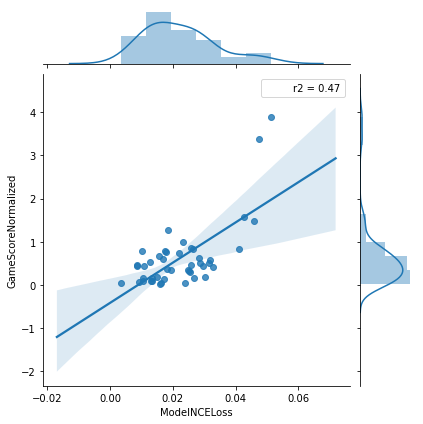

In [118]:
byol_names[15]
df = byol_sweeps[15]

sns.jointplot(df.ModelNCELoss, df.GameScoreNormalized, kind="reg", stat_func=r2)

In [116]:
from sklearn import linear_model
import sklearn

for df, name in zip(byol_sweeps, byol_names):

    # sns.jointplot(df.ModelNCELoss,
    #               df.GameScoreDERNormalized,
    #               kind="reg", stat_func=r2)
    import statsmodels.api as sm
    preprocessing = sklearn.preprocessing.OneHotEncoder()
    game_vars = np.array(list(df.game)).reshape(-1, 1)
    game_vars = preprocessing.fit_transform(game_vars).todense()
    byol_losses = np.array(list(df.ModelNCELoss)).reshape(-1, 1)
#     byol_losses = sklearn.preprocessing.scale(byol_losses)
    variables = np.concatenate([game_vars, byol_losses], axis=1)
    targets = np.array(list(df.GameScoreNormalized)).reshape(-1, 1)

    regression = sm.GLS(targets, variables).fit()
#     regression.fit(variables, targets)

    print(name)
    print("Regression Coefficients:")
    print(regression.summary())
    print()

tag: ram_bits_test_hybrid_byol_nogs_squared
Regression Coefficients:
                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            GLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     42.58
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           3.08e-16
Time:                        15:33:05   Log-Likelihood:                 26.755
No. Observations:                  45   AIC:                            -33.51
Df Residuals:                      35   BIC:                            -15.44
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Use

tag: byol_base_aug_control
Regression Coefficients:
                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.621
Model:                            GLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     6.678
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           1.88e-12
Time:                        15:33:05   Log-Likelihood:                -69.510
No. Observations:                 128   AIC:                             191.0
Df Residuals:                     102   BIC:                             265.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = co

tag: byol_ql1_b0_naug
Regression Coefficients:
                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            GLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     2.612
Date:                Fri, 26 Jun 2020   Prob (F-statistic):             0.0201
Time:                        15:33:06   Log-Likelihood:                -16.170
No. Observations:                  45   AIC:                             52.34
Df Residuals:                      35   BIC:                             70.41
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1   

C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Use

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            GLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     11.51
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           5.01e-20
Time:                        15:33:06   Log-Likelihood:                 37.235
No. Observations:                 130   AIC:                            -22.47
Df Residuals:                     104   BIC:                             52.09
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0672      0.091      0.740      0.4

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            GLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     24.06
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           1.83e-12
Time:                        15:33:06   Log-Likelihood:                 7.1538
No. Observations:                  45   AIC:                             5.692
Df Residuals:                      35   BIC:                             23.76
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4929      0.312      1.578      0.1

C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigv

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.648
Model:                            GLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     7.574
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           4.63e-14
Time:                        15:33:06   Log-Likelihood:                -18.168
No. Observations:                 129   AIC:                             88.34
Df Residuals:                     103   BIC:                             162.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0658      0.139      0.472      0.6

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.448
Model:                            GLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     3.153
Date:                Fri, 26 Jun 2020   Prob (F-statistic):            0.00689
Time:                        15:33:06   Log-Likelihood:                 14.151
No. Observations:                  45   AIC:                            -8.303
Df Residuals:                      35   BIC:                             9.764
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3055      0.336      0.909      0.3

C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\user1\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = co

In [215]:
print(" ".join(list(map(str, range(9069677, 9069901)))))
    

9069677 9069678 9069679 9069680 9069681 9069682 9069683 9069684 9069685 9069686 9069687 9069688 9069689 9069690 9069691 9069692 9069693 9069694 9069695 9069696 9069697 9069698 9069699 9069700 9069701 9069702 9069703 9069704 9069705 9069706 9069707 9069708 9069709 9069710 9069711 9069712 9069713 9069714 9069715 9069716 9069717 9069718 9069719 9069720 9069721 9069722 9069723 9069724 9069725 9069726 9069727 9069728 9069729 9069730 9069731 9069732 9069733 9069734 9069735 9069736 9069737 9069738 9069739 9069740 9069741 9069742 9069743 9069744 9069745 9069746 9069747 9069748 9069749 9069750 9069751 9069752 9069753 9069754 9069755 9069756 9069757 9069758 9069759 9069760 9069761 9069762 9069763 9069764 9069765 9069766 9069767 9069768 9069769 9069770 9069771 9069772 9069773 9069774 9069775 9069776 9069777 9069778 9069779 9069780 9069781 9069782 9069783 9069784 9069785 9069786 9069787 9069788 9069789 9069790 9069791 9069792 9069793 9069794 9069795 9069796 9069797 9069798 9069799 9069800 9069801 